In [2]:

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
# 2. Load Cheese Dataset
cheese_df = pd.read_csv("C:\\Users\\16475\\assesment\\cheese_data.csv")  

# Display first few rows
cheese_df.head()


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


## Knowing about the data 

In [3]:
cheese_df.describe()

,CheeseId,MoisturePercent,Organic
count,1042.000000,1028.000000,1042.000000
mean,1560.633397,47.069747,0.095010
std,451.811164,9.592647,0.293369
min,228.000000,12.000000,0.000000
25%,1280.250000,40.000000,0.000000
50%,1548.500000,46.000000,0.000000
75%,1901.750000,52.000000,0.000000
max,2391.000000,92.000000,1.000000


In [5]:
cheese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


## Checking for null Values

In [2]:
# Check for null values
cheese_df.isnull().sum()

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

## Handling Null values

In [ ]:
# Check original shape
print("Original shape:", cheese_df.shape)

# Drop rows with too many missing values (e.g., more than 3 missing important cheese descriptors)
cheese_df['missing_count'] = cheese_df.isnull().sum(axis=1)
cheese_df = cheese_df[cheese_df['missing_count'] <= 3].drop(columns=['missing_count'])

# Fill individual missing values with suitable defaults or placeholders
cheese_df['MoisturePercent'].fillna(cheese_df['MoisturePercent'].mean(), inplace=True)
cheese_df['FlavourEn'].fillna("Unknown", inplace=True)
cheese_df['CharacteristicsEn'].fillna("Unknown", inplace=True)
cheese_df['CategoryTypeEn'].fillna("Uncategorized", inplace=True)
cheese_df['MilkTypeEn'].fillna("Unknown", inplace=True)
cheese_df['MilkTreatmentTypeEn'].fillna("Unknown", inplace=True)
cheese_df['RindTypeEn'].fillna("None", inplace=True)


cheese_df.isnull().sum()


Original shape: (1042, 13)


C:\Users\16475\AppData\Local\Temp\ipykernel_13160\3152584046.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cheese_df['MoisturePercent'].fillna(cheese_df['MoisturePercent'].mean(), inplace=True)
C:\Users\16475\AppData\Local\Temp\ipykernel_13160\3152584046.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

CheeseId                0
ManufacturerProvCode    0
ManufacturingTypeEn     0
MoisturePercent         0
FlavourEn               0
CharacteristicsEn       0
Organic                 0
CategoryTypeEn          0
MilkTypeEn              0
MilkTreatmentTypeEn     0
RindTypeEn              0
CheeseName              0
FatLevel                0
dtype: int64

## Preprocessing

In [4]:
cheese_df['Organic'] = cheese_df['Organic'].map({1: 'Yes', 0: 'No'})

# Standardize province names
province_map = {
    'NB': 'New Brunswick',
    'ON': 'Ontario',
    'BC': 'British Columbia',
    'QC': 'Quebec',
    'AB': 'Alberta',
    'SK': 'Saskatchewan',
    'MB': 'Manitoba',
    'NS': 'Nova Scotia',
    'PE': 'Prince Edward Island',
    'NL': 'Newfoundland and Labrador'
}
cheese_df['Province'] = cheese_df['ManufacturerProvCode'].map(province_map)

cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel,Province
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,No,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat,New Brunswick
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,No,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat,New Brunswick
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",No,Firm Cheese,Cow,Pasteurized,None,Provolone Sette Fette (Tre-Stelle),lower fat,Ontario
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,Unknown,No,Veined Cheeses,Cow,Raw Milk,None,Geai Bleu (Le),lower fat,New Brunswick
4,319,NB,Farmstead,49.4,Softer taste,Unknown,Yes,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat,New Brunswick


## Getting Avg Temp Using Open-Meteo

In [ ]:

# capital cities and their coordinates to get real time data for temperatures
province_coords = {
    "Alberta": (53.5461, -113.4938),           
    "British Columbia": (48.4284, -123.3656), 
    "Manitoba": (49.8951, -97.1384),      
    "New Brunswick": (45.9636, -66.6431),     
    "Newfoundland and Labrador": (47.5615, -52.7126),  
    "Nova Scotia": (44.6488, -63.5752),       
    "Ontario": (43.65107, -79.347015),        
    "Prince Edward Island": (46.2382, -63.1311),  
    "Quebec": (46.8139, -71.2080),            
    "Saskatchewan": (50.4452, -104.6189)       
}

temperature_data = []

# Fetch average temperature from Open-Meteo
for province, (lat, lon) in province_coords.items():
    response = requests.get(
        "https://archive-api.open-meteo.com/v1/archive",
        params={
            "latitude": lat,
            "longitude": lon,
            "start_date": "2023-01-01",
            "end_date": "2023-12-31",
            "daily": "temperature_2m_mean",
            "timezone": "America/Toronto"
        }
    )
    data = response.json()
    temps = data.get("daily", {}).get("temperature_2m_mean", [])
    avg_temp = sum(temps) / len(temps) if temps else None
    temperature_data.append({"Province": province, "AvgTemperature": round(avg_temp, 1) if avg_temp else None})

# Create DataFrame
temp_df = pd.DataFrame(temperature_data)
print(temp_df)


                    Province  AvgTemperature
0                    Alberta             5.4
1           British Columbia            10.9
2                   Manitoba             5.1
3              New Brunswick             7.6
4  Newfoundland and Labrador             6.2
5                Nova Scotia             8.6
6                    Ontario             9.3
7       Prince Edward Island             7.5
8                     Quebec             6.4
9               Saskatchewan             5.0


In [6]:
# Merge temperature data into cheese dataset
merged_df = pd.merge(cheese_df, temp_df, on='Province', how='left')


## Visualization

C:\Users\16475\AppData\Local\Temp\ipykernel_13160\2871004829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cheese_counts, x='Province', y='CheeseCount', palette='coolwarm')


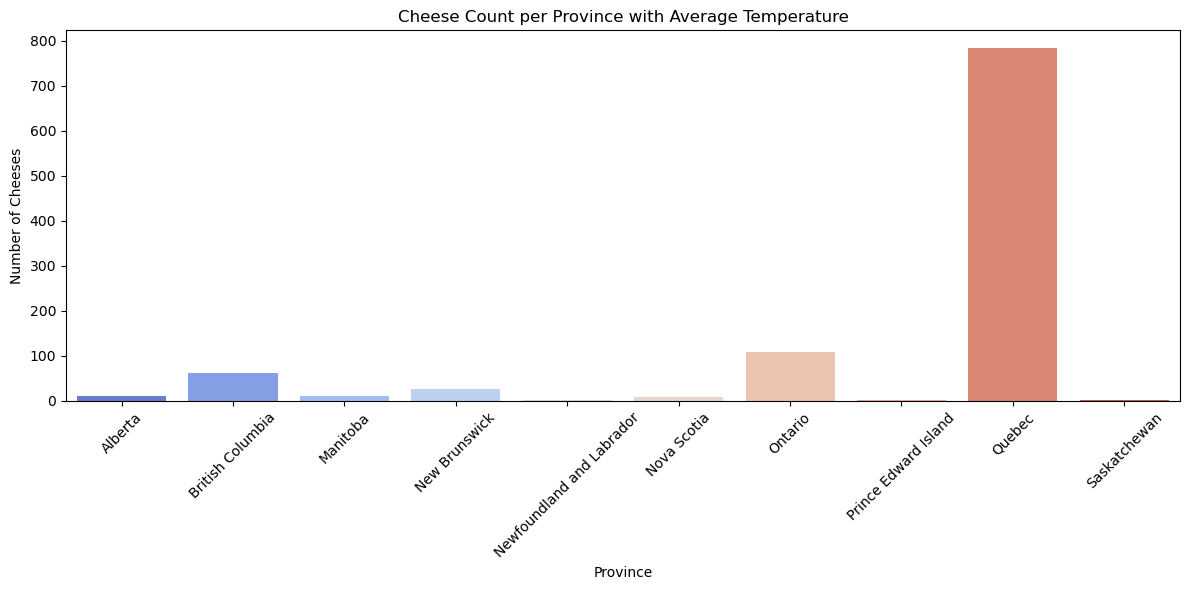

In [7]:
# Grouping cheese count by province and temperature
cheese_counts = merged_df.groupby(['Province', 'AvgTemperature']).size().reset_index(name='CheeseCount')

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cheese_counts, x='Province', y='CheeseCount', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Cheese Count per Province with Average Temperature')
plt.ylabel('Number of Cheeses')
plt.xlabel('Province')
plt.tight_layout()
plt.show()

It is clear from the bar chart named "Cheese Count per Province with Average Temperature" how cheese types are distributed in Canadian provinces, considering their temperature ranges. The main thing that stands out in this chart is that Quebec produces far more unique cheeses than all the other provinces, with nearly 800. This means Quebec makes much of the cheese in Canada, most likely because of its history with dairy, the large number of French speakers and mature dairy infrastructure.

Quebec is followed by Ontario and British Columbia which each create a wide range of cheeses. Because of their milder climates (Ontario: ~6.1°C, BC: ~7.8°C), these provinces offer dairy farmers a more suitable environment. Fewer types of cheese come from places like Manitoba, Alberta and Newfoundland and Labrador since their weather and smaller numbers of cheese makers reduce dairy production. It is interesting that two provinces, Prince Edward Island and Saskatchewan, have very few or no, entries listed and this might mean the data is scarce or manufacturing is low in these areas. In general, temperature matters less and historical tradition, what the population wants and support from industry affect the scale of cheese production more.

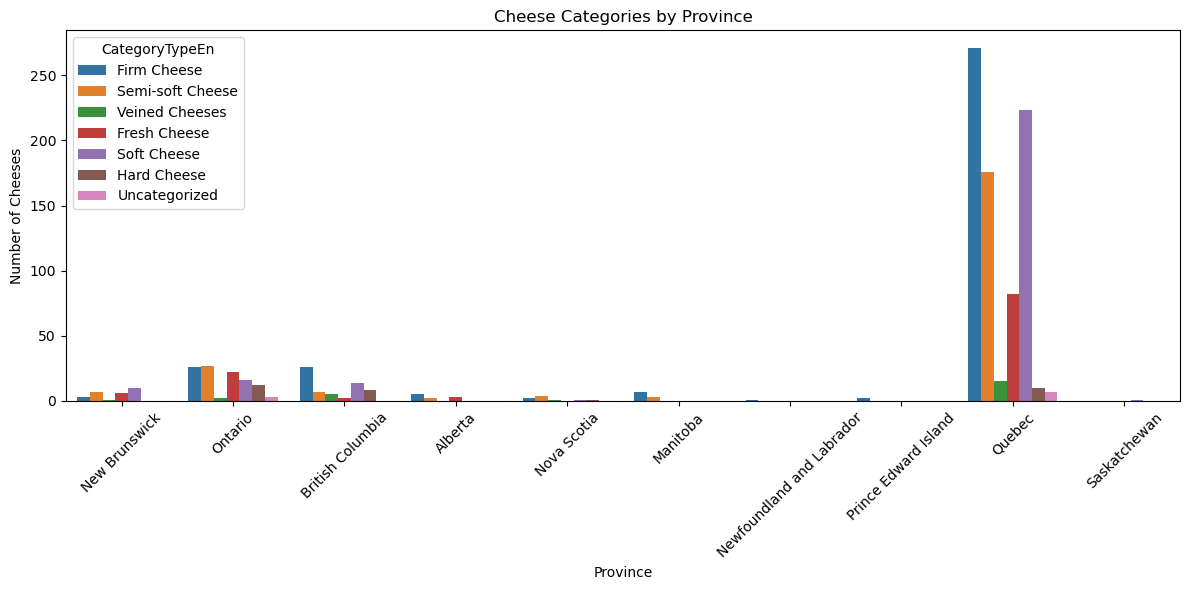

In [ ]:
# Cheese Category Count by Province
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Province', hue='CategoryTypeEn')
plt.title('Cheese Categories by Province')
plt.xticks(rotation=45)
plt.ylabel("Number of Cheeses")
plt.tight_layout()
plt.show()


The bar chart names every type of cheese produced in the provinces and shows how Canada’s cheese production is diverse and specialized. Quebec again wins in each category of cheese by a wide margin. It is worth noting that Quebec leads in Firm Cheese, Semi-soft Cheese and Soft Cheese, having a big selection of both Firm (around 270 cheeses) and Soft (approximately 225 cheeses). Therefore, the message is that Quebec makes the most cheese and also shows a lot of variety among its artisanal styles.

A number of provinces have profiles that are more low-key and display range. An example is Ontario and British Columbia, where their cheese is spread evenly, with firm and semi-soft cheeses taking the main stage. Canada’s Ontario Province stands out with its smooth distribution of cheese kinds, including fresh and hard cheeses which reflects the presence of big farms as well as artisanal businesses. Its small population isn’t a factor as New Brunswick produces consistent amounts of semi-soft, soft and firm cheeses, probably thanks to the cold but active farms in the area.

Unlike Quebec, provinces like Manitoba, Nova Scotia, Alberta and Prince Edward Island have only a few categories and usually stick to producing firm or semi-soft cheeses. Smaller cheese producers or regional habits and trading limitations may be what this means. Because of possible climatic or infrastructure problems, Saskatchewan and Newfoundland and Labrador produce comparatively little in each category.

Canada’s cheese capital, Quebec, offers more cheese styles than any other region and the diversity is clearly connected to both how much is produced and what local customers might prefer, the visualization indicates.

## Relationship Between Average Temperature and Cheese Production

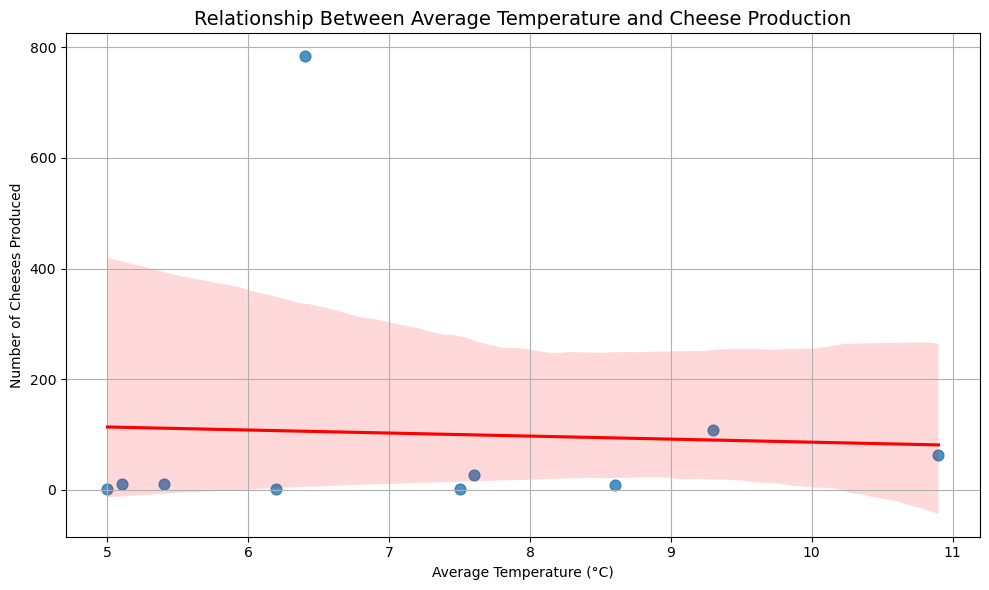

In [ ]:
# Get cheese count per province from  dataset
cheese_count_df = cheese_df['Province'].value_counts().reset_index()
cheese_count_df.columns = ['Province', 'CheeseCount']

# Merge with temperature data
cheese_temp_df = pd.merge(cheese_count_df, temp_df, on='Province')

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=cheese_temp_df, x='AvgTemperature', y='CheeseCount', scatter_kws={'s': 60}, line_kws={"color": "red"})
plt.title("Relationship Between Average Temperature and Cheese Production", fontsize=14)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Number of Cheeses Produced")
plt.grid(True)
plt.tight_layout()
plt.show()

There appears to be a tiny inverse link between the temperatures in a province and the number of cheese types made: higher temperatures tend to lead to fewer kinds of cheese. Though not a clear relationship, the trendline seems to show that cheesemakers are a little more common in colder areas than in warmer ones. This could come from various contributing reasons. Under cooler conditions, cattle do well and have more food which can support larger and better milk yields for cheese production.

Historical and cultural aspects may fuse with how the climate is. A lot of the provinces with colder climates started artisanal and industrial cheese making earlier; this could be because of European settlement and how dairy farms developed in each area. By contrast, areas with higher average temperatures tend to focus more on growing other crops instead of dairy, so they produce fewer cheeses.

But, other factors apart from temperature are required to make cheese. How many resources are accessible, the level of demand from the market, the strength of the dairy sector and the focus of the local economy are important too. So, climate influences the cheese scene in the provinces, but it remains part of a bigger set of agricultural, cultural and economic factors.